In [1]:
import numpy as np
#import os

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from setup import *
#from FullFrame import FullFrame
from Binning_Model import BinFunc_t


##--------------------------------------------------------------------------##
##             NECESSARY USER INPUTS BELOW....                              ##
##--------------------------------------------------------------------------##

##################
###   WASP4b   ###
##################
# obs_date='ut20150819'                           #observation date
# obj_name='Wasp4'                                #object name   
# midtime=['2015-08-19T07:43:00.00']                 #time of midtransit, WAsp-4b

###################
###   WASP52b   ###
###################
#obs_date='ut20160811'
#obs_date='ut20160922'
#obj_name='Wasp52'

#midtime=['2016-08-11T04:51:00']               #time of midtransit, Wasp-52b, Transit1
#midtime=['2016-09-22T04:44:00']               #time of midtransit, Wasp-52b, Transit2

##################
###   Hats8b   ###
##################
#obs_date='ut20170723'                           #observation date
obs_date='ut20170828'
obj_name='Hats8'                                #object name  

#midtime=['2017-07-24T05:28:01.056']                 #time of midtransit, Hats-8b, Transit 1
midtime=['2017-08-29T01:36:04.608']                 #time of midtransit, Hats-8b Transit 2

##################
### Wasp 67b  ###
##################
# obs_date='ut20180521'
# obj_name='Wasp67'
# midtime=['2018-05-22T06:54.00']


path='/Volumes/ermay_ext/Magellan/'+obs_date+'/'
data_path=path+obj_name+'_Spec/'      #path to where your data is saved
flat_path=path+obj_name+'_Flats/'     #path to where your SLIT flats are saved
DARKS=path+obj_name+'_Darks/'     #path to where your darks are saved
FLATS=path+'Full_Flats/'             #path to where the full field flats are saved 
WAVE=path+obj_name+'_Arcs/'

#SAVEPATH='SaveData/'+obj_name+'/'
SAVEPATH=path+'SaveData_'+obj_name+'/'

wavelength_path=path+'WaveSolution/'



extray=400 #number of extra pixels to extract per side in y direction
extrax=80  #number on the side to find wavelength strip, only for nights with a single mask


binn=1    #binning
#### CHECK BINNING IN SETUP.PY ####
#### if 1x1 binning, xpixels,ypixels should be 2048,4096
#### if 2x2 binning, xpixels,ypixels should be 1024,2048
print xpixels/binn, ypixels/binn

2048 4096


In [2]:
bin_width=200
bin_ctr=np.load(SAVEPATH+'LC_bins_'+str(int(bin_width))+'.npz')['bin_ctr']
print bin_ctr
n_bins=len(bin_ctr)
width=bin_ctr[1]-bin_ctr[0]
start=bin_ctr[0]-width/2
end=bin_ctr[-1]+width/2
print start,end,width,n_bins

[4900. 5100. 5300. 5500. 5700. 5900. 6100. 6300. 6500. 6700. 6900. 7100.
 7300. 7500. 7700. 7900. 8100. 8300. 8500. 8700. 8900. 9100. 9300.]
4800.0 9400.0 200.0 23


In [3]:
ShiftSpec=np.load(SAVEPATH+'ShiftedSpec_All.npz')
FlatSpec=np.load(SAVEPATH+'FlattenedSpectra.npz')
#BkGndSub=np.load(SAVEPATH+'FlatSpec_Obj0.npz')

#spec=ShiftSpec['data']
wave=ShiftSpec['wave']
print wave.shape
#pixs=ShiftSpec['pixels']
ysft=ShiftSpec['yshift']
print ysft.shape

#fwhm=FlatSpec['fwhm_av']
gaus=FlatSpec['gaus_params'][:,:,:,1]  #1=x-shift
bkgd_c=FlatSpec['gaus_params'][:,:,:,4]  #1=bg counts
#phte=FlatSpec['pht_err']

print gaus.shape
print bkgd.shape

n_exp=wave.shape[1]

(8, 92, 4153)
(8, 92)
(8, 92, 4153)


NameError: name 'bkgd' is not defined

In [ ]:
plt.plot(bkgd[0,:])
plt.show()

In [ ]:
waves0=np.fliplr(wave[:,:,:])
ys0=ysft[:,:]
xs0=np.fliplr(gaus)
bg0=np.fliplr(bkgd)
print waves0.shape

#white_x=np.empty([n_exp])*np.nan
#white_y=np.empty([n_exp])*np.nan
#white_bg=np.empty([n_exp])*np.nan


# binned_x=np.empty([n_exp,n_bins])*np.nan
# binned_y=np.empty([n_exp,n_bins])*np.nan
# binned_bg=np.empty([n_exp,n_bins])*np.nan


print start,end,width
__,white_x=BinFunc_t(xs0,waves0,start,end,end-start,True)
#__,white_y=BinFunc(xs0,waves0,start,end,end-width,True)
__,white_bg=BinFunc_t(bg0,waves0,start,end,end-start,True)

__,binned_x=BinFunc_t(xs0,waves0,start,end,width,True)
#__,white_y=BinFunc(xs0,waves0,start,end,end-width,True)
__,binned_bg=BinFunc_t(bg0,waves0,start,end,width,True)

[34.84421412]


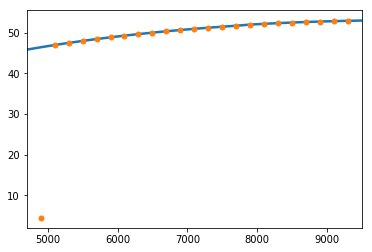

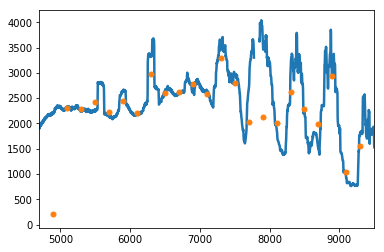

In [14]:

print white_x[0,:]

plt.plot(waves0[0,:],xs0[0,:],linewidth=2.5)
plt.plot(bin_ctr,binned_x[0,:],'.',markersize=10)
plt.xlim(bin_ctr[0]-width,bin_ctr[-1]+width)
plt.show()

plt.clf()

plt.plot(waves0[0,:],bg0[0,:],linewidth=2.5)
plt.plot(bin_ctr,binned_bg[0,:],'.',markersize=10)
plt.xlim(bin_ctr[0]-width,bin_ctr[-1]+width)
plt.show()

In [15]:
np.savez_compressed(SAVEPATH+'NoiseModel_Inputs_'+str(int(bin_width))+'.npz',
                    white_x=white_x[:,0],white_bg=white_bg[:,0],
                   binned_x=binned_x,binned_bg=binned_bg, yshift=ys0)


In [18]:
print white_x[:,0].shape
print binned_x.shape
print ys0.shape

(145,)
(145, 18)
(145,)


(9, 145)


(-2, 4)

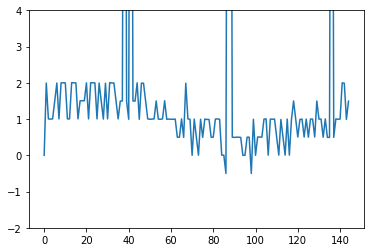

In [9]:
print ysft.shape
plt.plot(ysft[0,:])
plt.ylim(-2,4)